<a href="https://colab.research.google.com/github/ellenwang995/week3_NLTK/blob/main/session3_nltk_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📝 Python for Public Policy — Session 3 Worksheet  
**Theme:** Text Analysis with NLTK (Inaugural Speeches or Your Own `.txt`)

Use this notebook during the 60‑minute student-driven block. **No presentations** at the end.  
You may analyze an NLTK inaugural speech **or** upload your own plain text file (`.txt`).

**Timing guide:**  
- Part A: 10 min · Part B: 10 min · Part C: 10 min · Part D: 10 min · Part E: 10 min · Part F: 10 min



## Part 0 — Setup (run once)
Upgrade NLTK (Colab often pins an older version) and download the datasets we need.


In [1]:

# We upgrade NLTK to the latest version so functions and data work as expected.
!pip -q install -U nltk

# Now we import nltk and download only the small packages we need for this session.
import nltk
needed = ["punkt_tab",           # tokenizer (splits text into words)
          "stopwords",       # list of common words to remove (the, and, is, ...)
          "wordnet",         # lexical database used for lemmatization (getting word roots)
          "averaged_perceptron_tagger_eng",  # part-of-speech tagger (N/V/Adj/Adv)
          "inaugural"]       # a small corpus of U.S. inaugural addresses
for pkg in needed:
    nltk.download(pkg, quiet=True) # no status text printed - just downloads

print("NLTK version:", nltk.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
NLTK version: 3.9.2



## Part A — Pick Your Text (10 min)
Choose **one** source below.

### Option 1 — Use the built-in Inaugural Speeches corpus


In [39]:

from nltk.corpus import inaugural
fileids = inaugural.fileids()
fileids[:10]  # preview a few
# Choose one speech (change the index or pick a specific filename from 'fileids')
s1, s2 = fileids[-6], fileids[-7]
raw, raw2 = inaugural.raw(s1), inaugural.raw(s2)
print("Analyzing:", s1, "| characters:", len(raw))
print("Analyzing:", s2, "| characters:", len(raw2))


Analyzing: 2005-Bush.txt | characters: 12018
Analyzing: 2001-Bush.txt | characters: 9053



### Option 2 — Upload your own `.txt`
> Must be **plain text** (e.g., speech, policy memo, report). If you upload multiple files, we’ll read the first one.


If you don’t already have a `.txt` file (like the inaugural corpus examples), you can **make one directly in Colab**.  
This is helpful if you want to analyze text copied from a website, a PDF, or your own writing.

📝 Example: paste any text (such as a news article, policy speech, or blog post) into the triple quotes below.

In [6]:

# Create a plain-text file in Colab
text = """Paste your speech or policy text here.
You can copy/paste from a website or document.
Keep it short at first (a few paragraphs)."""

# Write the text into a .txt file
with open("mytext.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("✅ Saved mytext.txt")

# Load your saved .txt file
with open("mytext.txt", encoding="utf-8") as f:
    raw = f.read()

print(raw[:500])  # print first 500 characters



✅ Saved mytext.txt
Paste your speech or policy text here.
You can copy/paste from a website or document.
Keep it short at first (a few paragraphs).



**Q:** Which text did you choose and why? *(Write a 1–2 sentence note below.)*


In [7]:

# Your short reflection:
choice_note = """
(Explain your choice here.)
"""
print(choice_note)



(Explain your choice here.)




## Part B — Tokenize & Explore (10 min)
Lowercase and keep only alphabetic tokens (drop punctuation/numbers) for a quick clean view.


In [53]:

from nltk.tokenize import word_tokenize

# Tokenize: split into tokens, lowercase them, keep alphabetic tokens only
tokens1 = [w.lower() for w in word_tokenize(raw) if w.isalpha()]
print(len(tokens), tokens[:10])

tokens2 = [w.lower() for w in word_tokenize(raw2) if w.isalpha()]
print(len(tokens2), tokens2[:10])


2018 ['vice', 'president', 'cheney', 'chief', 'justice', 'president', 'carter', 'president', 'bush', 'president']
1582 ['president', 'clinton', 'distinguished', 'guests', 'and', 'my', 'fellow', 'citizens', 'the', 'peaceful']


In [54]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

def tokenize_norm(text):
    tok = RegexpTokenizer(r"[A-Za-z0-9]+")
    return [t.lower() for t in tok.tokenize(text)]


def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

def run_pipeline(text):
    toks = tokenize_norm(text)
    toks_nostop = remove_stopwords(toks)
    clean = pos_lemmatize(toks_nostop)
    return toks, toks_nostop, clean

toks, toks_nostop, clean = run_pipeline(raw)
print("Speech:", s1)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))
print("Top 10 (clean):", FreqDist(clean).most_common(10))

toks, toks_nostop, clean = run_pipeline(raw2)
print("Speech:", s2)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))
print("Top 10 (clean):", FreqDist(clean).most_common(10))

Speech: 2005-Bush.txt
Counts -> toks: 2087 | no-stop: 1044 | clean: 1044
Top 10 (clean): [('freedom', 27), ('america', 20), ('liberty', 15), ('nation', 12), ('every', 10), ('one', 9), ('country', 8), ('time', 8), ('see', 8), ('come', 8)]
Speech: 2001-Bush.txt
Counts -> toks: 1594 | no-stop: 776 | clean: 776
Top 10 (clean): [('nation', 13), ('america', 11), ('u', 11), ('story', 10), ('country', 9), ('citizen', 8), ('american', 8), ('live', 7), ('time', 7), ('call', 6)]



**Questions:**  
1) How many tokens (words) are in your text?  
2) List 5 tokens you expected to see. Were they present?



## Part C — Keyword in Context (10 min)
Use *concordance* to see your keywords in context.


In [71]:

from nltk.text import Text
T = Text(tokens1)

# Try two policy keywords of interest (edit these):
print("Concordance for", s1, "\n")
T.concordance("security", width=70, lines=12)
T.concordance("freedom", width=70, lines=12)

T2 = Text(tokens2)
print("\n\n")
print("Concordance for", s2, "\n")
T2.concordance("security", width=70, lines=12)
T2.concordance("freedom", width=70, lines=12)







Concordance for 2005-Bush.txt 

Displaying 3 of 3 matches:
 the urgent requirement of our security and the calling of our time so
 citizens find the dignity and security of economic independence inste
d the homestead act the social security act and the bill of rights and
Displaying 12 of 24 matches:
ntury america defended our own freedom by standing watch on distant b
and that is the force of human freedom we are led by events and commo
 our world is the expansion of freedom in all the world vital interes
y force of arms when necessary freedom by its nature must be chosen a
eir own voice attain their own freedom and make their own way the gre
sion which is always wrong and freedom which is eternally right ameri
un there is no justice without freedom and there can be no human righ
ned by the swiftest advance of freedom ever seen is an odd time for d
 ideals eventually the call of freedom comes to every mind and every 
s abraham lincoln did who deny freedom to others deserve it not for t


**Prompt:** In 2–3 sentences, what do the surrounding words suggest about how these topics are framed?


In [ ]:

analysis_notes = """
(Write your brief interpretation here.)
"""
print(analysis_notes)



## Part D — Dispersion Plot (10 min)
Where do topics appear (beginning/middle/end)? Replace terms with 3–5 of your own.


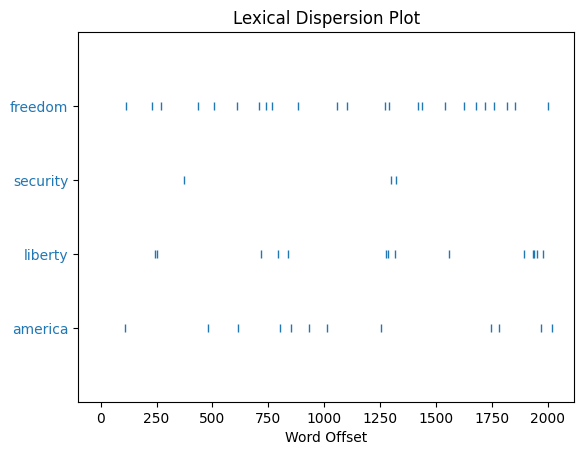

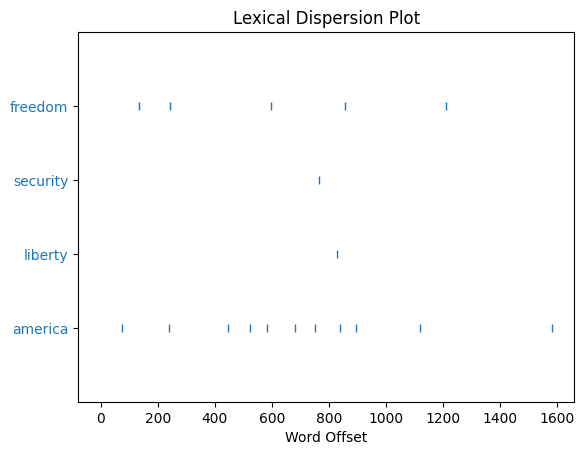

In [76]:

# NLTK's dispersion_plot uses matplotlib under the hood
T.dispersion_plot(["freedom", "security", "liberty", "america"])
T2.dispersion_plot(["freedom", "security", "liberty", "america"])


**Prompt:** What patterns do you notice? Why might this matter for policy framing?


In [ ]:

framing_notes = """
(Write your observations here.)
"""
print(framing_notes)



## Part E — Lexical Diversity (10 min)
Lexical diversity = unique words / total words. Use a fixed slice for fair comparisons.


In [73]:

def lexical_diversity(tok_list, n=None):
    """Return unique/total; if n is provided, compute on first n tokens."""
    if n:
        tok_list = tok_list[:n]
    total = len(tok_list) if tok_list else 1
    return len(set(tok_list)) / total

div_all1 = lexical_diversity(tokens)
div_all2 = lexical_diversity(tokens2)
print("Lexical diversity 2005 Speech:", round(div_all1, 4))
print("Lexical diversity 2001 Speech:", round(div_all2, 4))


Lexical diversity 2005 Speech: 0.3484
Lexical diversity 2001 Speech: 0.3666



**Why it matters (policy analysis):** Differences in lexical diversity can reflect changes in audience targeting, technicality vs. accessibility, or agenda breadth (e.g., a narrow crisis speech vs. a broad programmatic agenda).  

*(Optional)* Compare with a second speech by repeating Part A for another `fileid` and recomputing diversity on the same slice size.



## Part F — Reflection (10 min)
- Which tool felt most useful for policy analysis (concordance, dispersion, lexical diversity)? Why?  
- How could you apply this to a real policy dataset (hearings, legislation, news, social media)?


In [ ]:

final_reflection = """
(Write your brief reflection here.)
"""
print(final_reflection)



---
## 🚀 Stretch Challenges (Optional)

### 1) Collocations (common policy phrases)
Find frequently co-occurring word pairs (bigrams). These can reveal informative policy phrases (e.g., *national security*, *climate change*).


In [ ]:

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Use a filtered token list (already lowercase & alphabetic)
finder = BigramCollocationFinder.from_words(tokens)
# Only consider reasonably frequent bigrams (adjust min_freq to taste)
finder.apply_freq_filter(3)
bigrams_pmi = finder.nbest(BigramAssocMeasures.pmi, 15)
bigrams_pmi



### 2) VADER sentiment on short snippets
Useful for very short statements (tweets, headlines). For long speeches, sentiment averages toward neutral.


In [ ]:

# VADER is in nltk.sentiment
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

samples = [
    "We will rebuild our economy and create jobs.",
    "War brings hardship and loss.",
    "Together we can protect our freedoms."
]

for s in samples:
    print(s, "->", sia.polarity_scores(s))



### 3) Compare two texts (quick)
Repick another `fileid` and compute lexical diversity on the same slice (e.g., 2,000 tokens). What differences do you see?


In [ ]:

# Example scaffold:
# s2 = fileids[-1]
# raw2 = inaugural.raw(s2)
# tokens2 = [w.lower() for w in word_tokenize(raw2) if w.isalpha()]
# print("A:", s1, "div(2k) =", round(lexical_diversity(tokens, 2000), 4))
# print("B:", s2, "div(2k) =", round(lexical_diversity(tokens2, 2000), 4))



### 4) Quick frequency table + matplotlib bar chart
Show top 15 tokens (after simple cleaning). *Keep charts simple and readable.*


In [ ]:

from nltk import FreqDist
import matplotlib.pyplot as plt

fd = FreqDist(tokens)
top = fd.most_common(15)

labels, counts = zip(*top)
plt.figure(figsize=(10,4))
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.title("Top 15 tokens")
plt.tight_layout()
plt.show()
